In [1]:
import networkx as nx

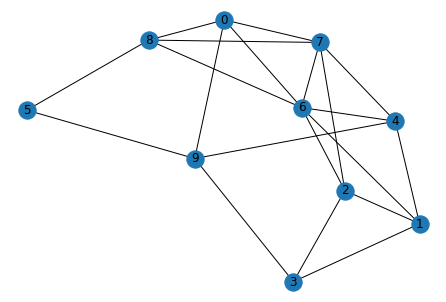

In [2]:
G = nx.erdos_renyi_graph(10, 0.4)
nx.draw(G, with_labels=True)

In [37]:
# count number of triangles by doing breadth-first-search

from collections import Counter

# _triangles_and_degree_iter
# adjacency list
nodes_nbrs = G.adj.items()

triangles = []
# (node, neighbors(node))
for v, v_nbrs in nodes_nbrs:
    # list of neighbours excluding self-link
    vs = set(v_nbrs) - {v}

    # get each neighbor's neighbors (excluding neighbors)
    # find those common with current neighbors
    gen_degree = Counter(
        len(vs & (set(G[w]) - {w})) for w in vs
    )

    ntriangles = (sum(k * val for k, val in gen_degree.items()) // 2)

    triangles.append([len(vs), ntriangles])

    # yield (v, len(vs), ntriangles, gen_degree)

triangles

[[4, 3],
 [4, 3],
 [4, 3],
 [3, 1],
 [4, 2],
 [2, 0],
 [6, 7],
 [5, 5],
 [4, 3],
 [4, 0]]

In [38]:
# transitivity
triangles_contri = [(t, d*(d-1)) for d, t in triangles]
triangles_, contri_ = map(sum, zip(*triangles_contri))
triangles_, contri_, triangles_/contri_

(27, 130, 0.2076923076923077)

In [42]:
# clustering
clusterc = [2*t / (d*(d-1)) for d, t in triangles]
clusterc

[0.5,
 0.5,
 0.5,
 0.3333333333333333,
 0.3333333333333333,
 0.0,
 0.4666666666666667,
 0.5,
 0.5,
 0.0]

In [36]:
nx.clustering(G)

{0: 0.5,
 1: 0.5,
 2: 0.5,
 3: 0.3333333333333333,
 4: 0.3333333333333333,
 5: 0,
 6: 0.4666666666666667,
 7: 0.5,
 8: 0.5,
 9: 0}